<a href="https://colab.research.google.com/github/A01252830/Laboratorio_A01252830/blob/main/ActividadPatronesConKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/MyDrive/TC1002S/datasets/

/content/drive/MyDrive/TC1002S/datasets


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving credit.csv to credit (4).csv
User uploaded file "credit.csv" with length 22368 bytes


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [70]:
credits = pd.read_csv("credit.csv")
credits = credits.drop("Unnamed: 0", axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
num_cols = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance"]
x = credits.loc[:, num_cols]
scal = StandardScaler()
xnorm = scal.fit_transform(x)
xnorm = pd.DataFrame(xnorm, columns=num_cols)
xnorm.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-0.407277
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.834056
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.130634
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.966900
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-0.411633


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Kmax = 16
groups = range(2, Kmax)
wcss = []
sil_score = []

for k in groups:
    model = KMeans(n_clusters=k, random_state = 47)
    clusters = model.fit_predict(xnorm)
    wcss.append(model.inertia_)
    sil_score.append(silhouette_score(xnorm, clusters))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Silhouette Score')

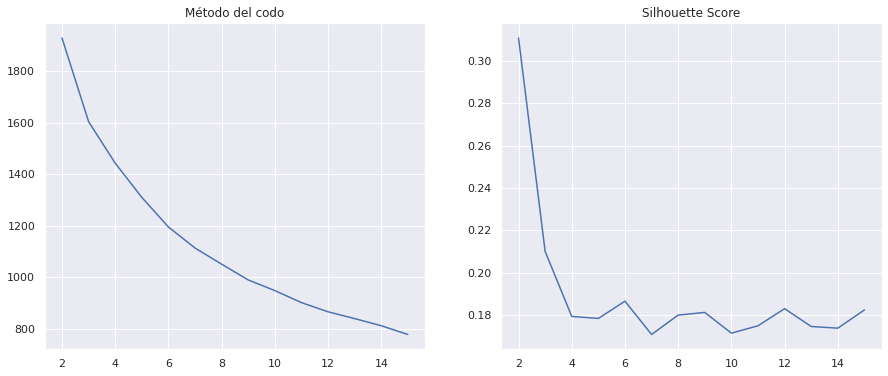

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(groups, wcss)
axs[0].set_title("Método del codo")

axs[1].plot(groups, sil_score)
axs[1].set_title("Silhouette Score")

In [71]:
model = KMeans(n_clusters=6, random_state=47)
clusters = model.fit_predict(xnorm)
centers = model.cluster_centers_
credits["Grupo"] = clusters.astype("str")
credits.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Grupo
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,5
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,4
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,2


Text(0.5, 1.05, '6 grupos de clientes')

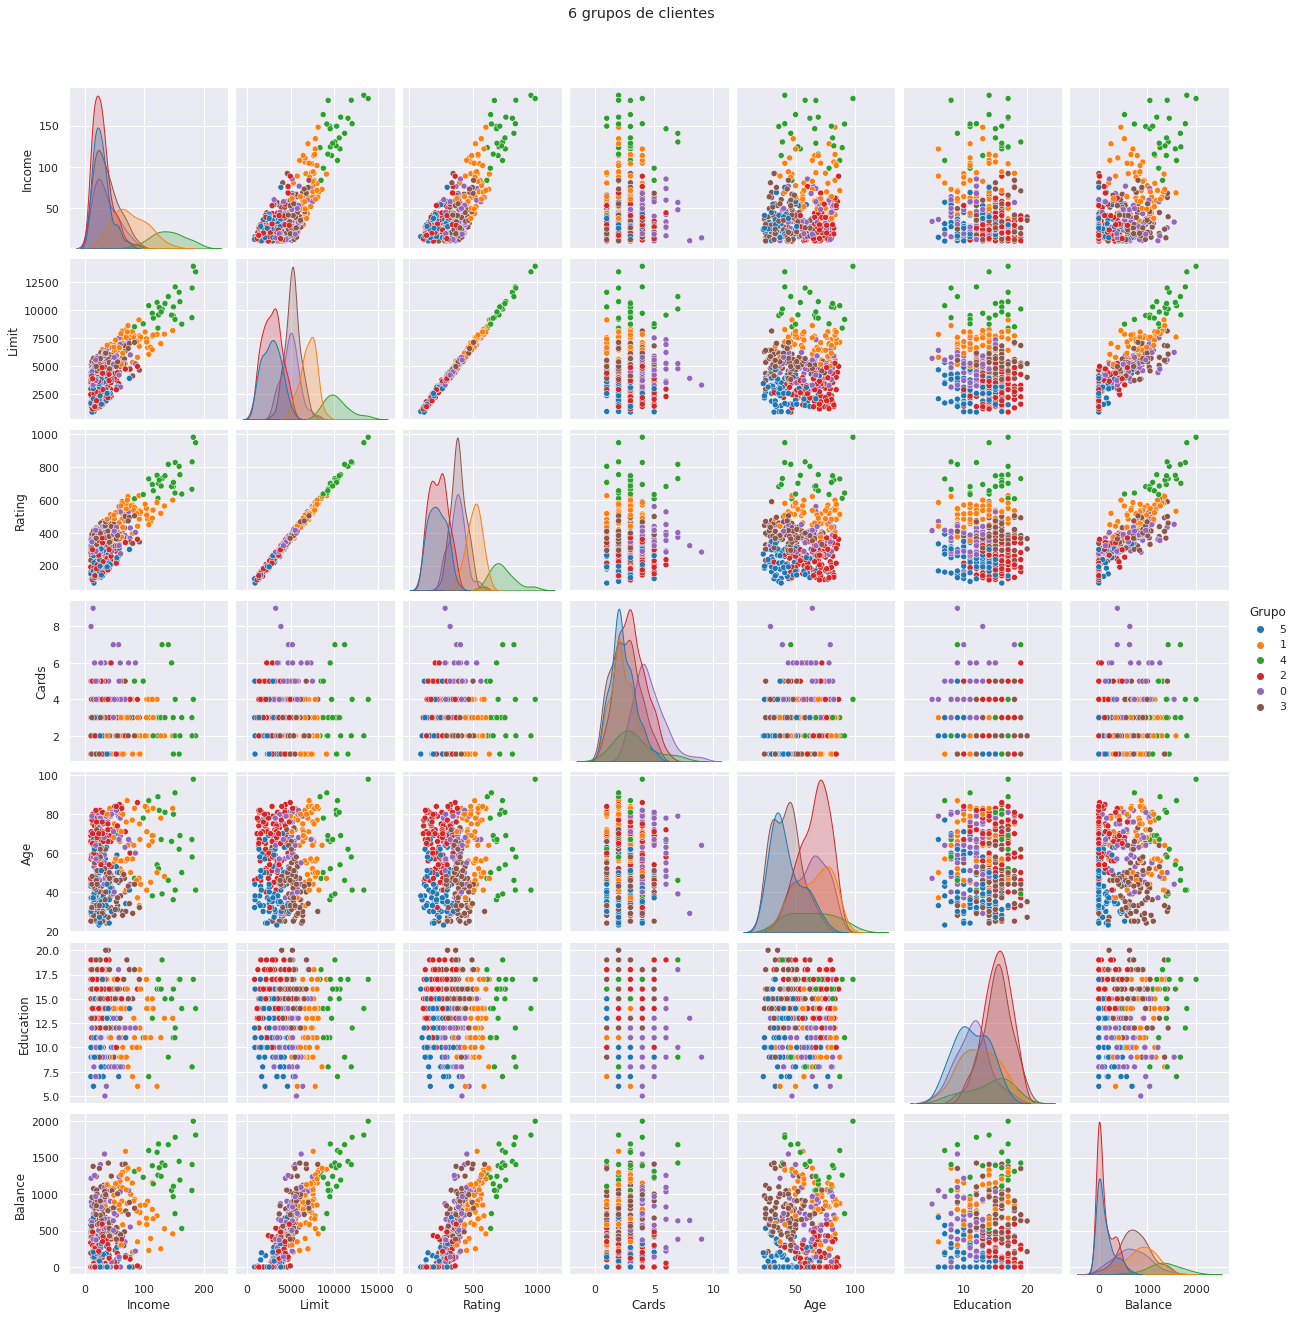

In [68]:
sns.pairplot(data=credits, hue="Grupo", palette="tab10")
plt.suptitle("6 grupos de clientes", y=1.05)

In [72]:
import plotly.express as px

fig = px.scatter_3d(credits, x = "Income", y = "Age", 
                    z = "Balance", 
                    title="6 grupos de clientes",
                    color="Grupo",  
                    color_discrete_sequence=px.colors.qualitative.D3)
fig.show()